# Credit Card Fraud Detection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [3]:
!pip install seaborn

In [4]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


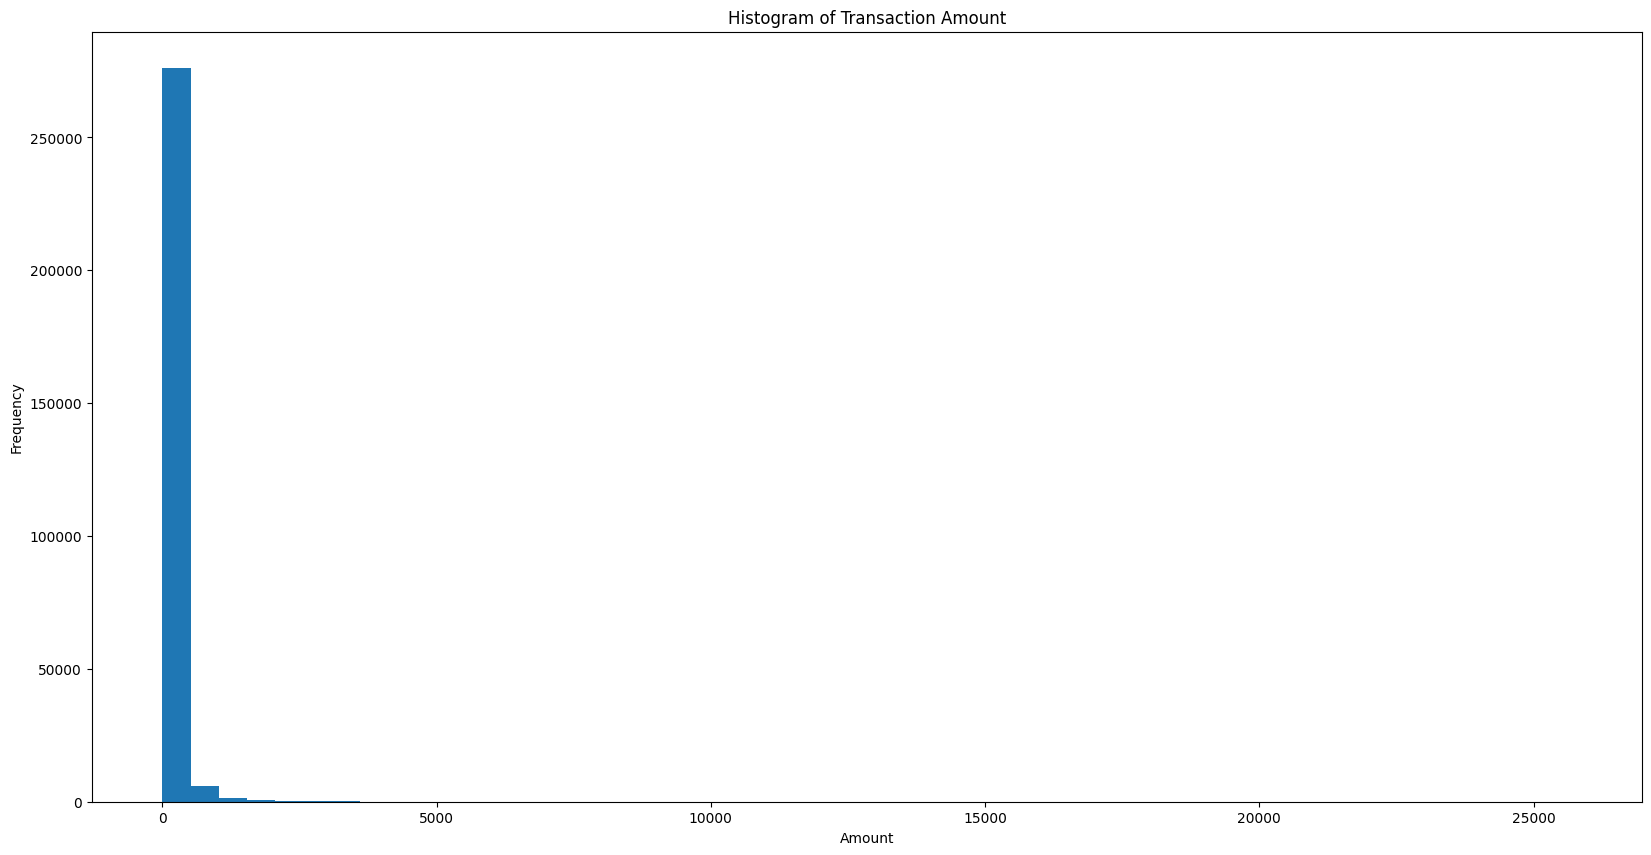

In [5]:
plt.hist(df['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')
plt.show()


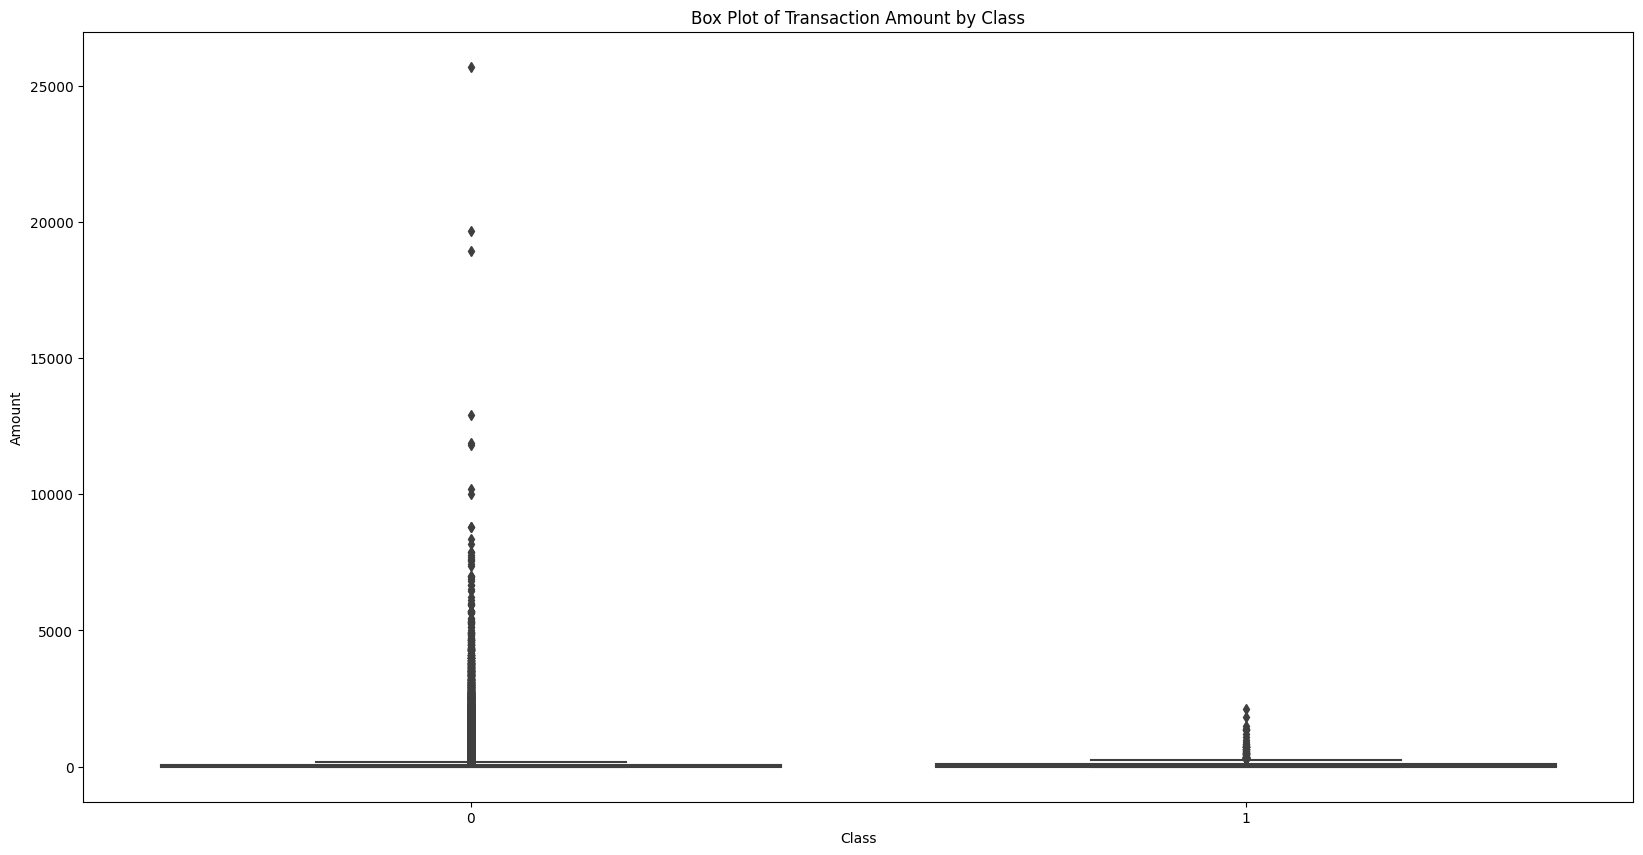

In [6]:
sns.boxplot(x = 'Class', y ='Amount' , data = df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Box Plot of Transaction Amount by Class')
plt.show()

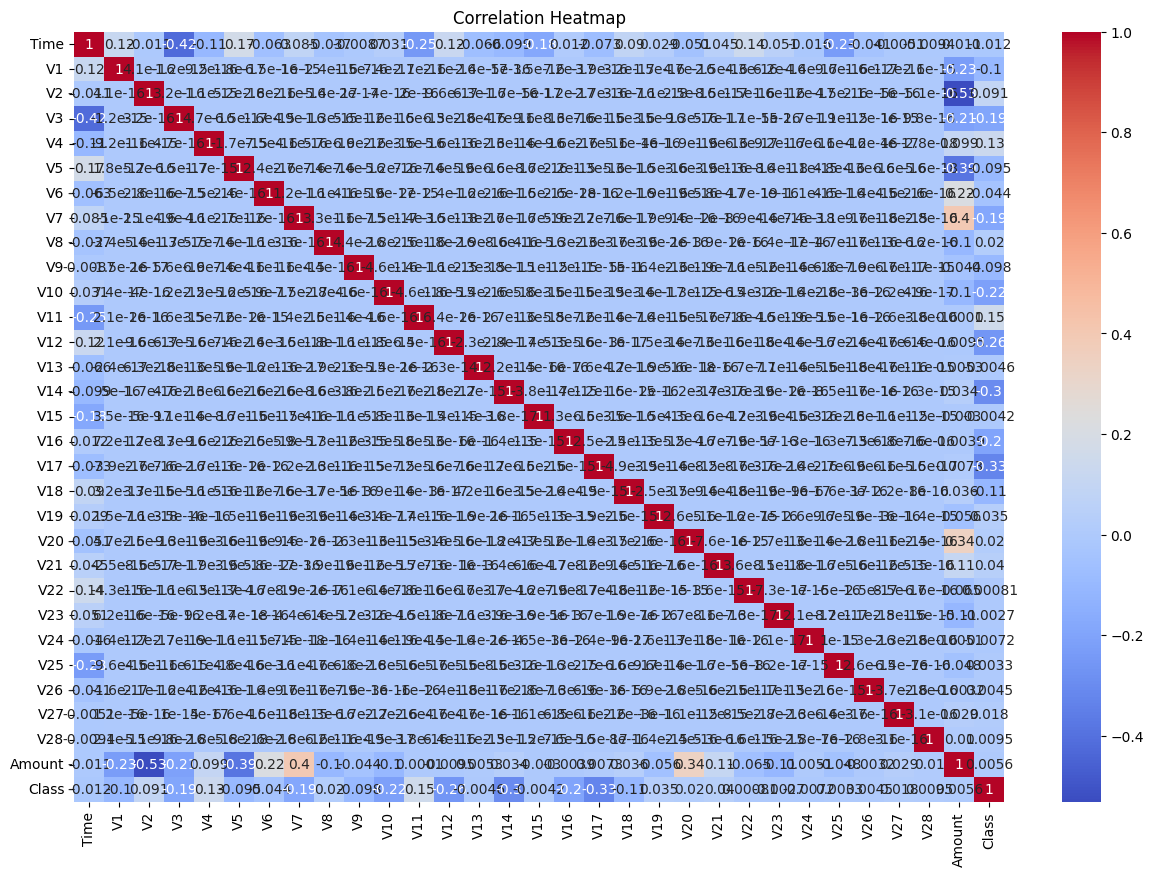

In [7]:
corr = df.corr()
matplotlib.rcParams["figure.figsize"]=(15,10)
sns.heatmap(corr, cmap ='coolwarm', annot = True)
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
median = df['Amount'].median()
min_value = df['Amount'].min()
max_value = df['Amount'].max()

print('Median:', median)
print('IQR:', IQR)
print('Minimum:', min_value)
print('Maximum:', max_value)

Median: 16.0
IQR: 71.565
Minimum: 0.0
Maximum: 184.5


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Amount','Time']]= scaler.fit_transform(df[['Amount','Time']])
print(df[['Amount', 'Time']])

          Amount      Time
0       0.810949  0.000000
1       0.014580  0.000000
3       0.669377  0.000006
4       0.379350  0.000012
5       0.019892  0.000012
...          ...       ...
284801  0.014580  0.999983
284802  0.004173  0.999988
284803  0.134363  0.999994
284804  0.367913  1.000000
284805  0.054201  1.000000

[252903 rows x 2 columns]


## Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train



260291    0
142877    0
179123    0
156743    0
184305    0
         ..
135732    0
117935    0
148895    0
164985    0
138040    0
Name: Class, Length: 202322, dtype: int64

In [13]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
260291,0.922992,2.008678,-0.417842,-0.680107,0.360350,-0.242482,-0.023237,-0.510269,0.020606,1.155425,...,-0.149377,-0.257353,-0.670293,0.269757,-1.090587,-0.465835,0.044733,-0.015994,-0.045938,0.162547
142877,0.491886,-3.019125,3.676753,-1.665704,0.456419,-0.807676,-1.397271,0.164419,0.830868,0.948286,...,1.084965,-0.163536,0.559295,0.190264,0.383593,-0.231729,-0.508051,-0.059086,-0.649342,0.009702
179123,0.717243,2.109657,0.521720,-3.470093,0.469621,1.471653,-1.005073,0.604578,-0.211299,0.042212,...,-0.194453,-0.077397,-0.124418,-0.114196,-0.121005,0.403125,0.705635,-0.096363,-0.032713,0.004119
156743,0.629893,-0.501650,0.528513,0.928346,-1.256275,2.659054,4.175553,-0.124988,0.844914,1.362456,...,0.136523,-0.312409,-0.561977,-0.267003,0.597666,0.301067,-0.706981,-0.060370,-0.152430,0.008184
184305,0.730305,1.920395,-0.675053,-0.956858,-0.387362,-0.696090,-1.067888,-0.113260,-0.238384,1.230176,...,-0.108463,0.354253,1.394160,-0.094750,0.718779,0.239138,1.004214,-0.073988,-0.075201,0.243902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135732,0.470964,-1.945611,1.645678,-0.063891,1.716029,-1.395291,-1.057649,-0.532792,1.148104,-0.554903,...,-0.123091,0.182157,0.258846,0.003427,0.698181,0.010753,-0.145296,-0.164749,-0.038597,0.183252
117935,0.433352,1.346465,-0.500611,0.624692,-0.705316,-0.948892,-0.476496,-0.675131,-0.082215,-0.812790,...,0.110134,0.147230,0.401925,0.031926,0.116531,0.316709,-0.256962,0.036784,0.021013,0.086721
148895,0.522583,0.116804,1.124966,-0.189357,-0.411574,1.179856,-0.677778,1.114330,-0.460061,1.417527,...,0.049699,-0.532265,-0.991069,0.079980,0.418580,-0.452823,0.039088,-0.097230,-0.151803,0.048726
164985,0.677854,-0.348972,0.457716,1.467516,-0.683567,0.106562,0.005166,0.242253,0.133368,0.345197,...,-0.059041,0.240587,0.777556,-0.177885,0.789717,-0.365805,0.501540,0.119394,0.165962,0.062331


## Handling Class Imbalance

###### Oversampling with SMOTE
###### Ensemble methods using Random Forest

In [14]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 42) 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
